In [2]:
# Mount Google Drive untuk membaca file CSV
import os
from google.colab import drive
drive.mount('/content/drive')

loc = '/content/drive/My Drive/laskar ai/Projek Sentimen Analisis'
os.chdir(loc)

os.getcwd()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


'/content/drive/My Drive/laskar ai/Projek Sentimen Analisis'

In [3]:
!pip install pipreqs
!pip install nltk
!pip install gensim
!pip install Sastrawi
!pip install tensorflow
!pip install transformers
!pip install fasttext
!pip install torch torchvision torchaudio
!pip install optuna
!pip freeze > requirements.txt

## Import Library

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import nltk
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from gensim.models import Word2Vec
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding, SpatialDropout1D
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, BertModel
import requests
import torch
import csv
from io import StringIO

## Load Dataset

In [5]:
# Load dataset
df = pd.read_csv("hasil_scraping_dana.csv")


## Exploratory Data Analysis (EDA)

In [6]:
print("Dataset Loaded. Shape:", df.shape)

Dataset Loaded. Shape: (100000, 11)


In [7]:
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,9ace9065-c0c1-40f6-89c4-11dfaedb9926,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Tolong dong aplikasinya di perkuat lagi keaman...,1,322,2.76.0,2025-03-23 14:20:12,NaN,NaN,2.76.0
1,54d0d14b-4a3f-4cd3-986c-86b01db0eb01,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Koneksi gak jelas, koneksi gak stabil, gak bis...",2,223,2.74.0,2025-03-19 16:07:35,NaN,NaN,2.74.0
2,1374d244-ab97-4a28-beba-b04f6a85fd4e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Untuk develover aplikasi Dana Saya terkendala ...,2,284,2.74.0,2025-03-12 03:35:50,NaN,NaN,2.74.0
3,65683514-6499-4943-85ad-1ee201cd384b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi yang sangat mudah pemakaiannya dan sa...,5,2452,2.72.0,2025-03-05 13:24:50,NaN,NaN,2.72.0
4,6e9301e9-6205-40bb-b398-7d55b96b1dd1,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Kelemahan dana, 1. kurang nya fitur keamanan t...",1,75,2.72.0,2025-03-25 03:50:27,NaN,NaN,2.72.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              100000 non-null  object
 1   userName              100000 non-null  object
 2   userImage             100000 non-null  object
 3   content               100000 non-null  object
 4   score                 100000 non-null  int64 
 5   thumbsUpCount         100000 non-null  int64 
 6   reviewCreatedVersion  83783 non-null   object
 7   at                    100000 non-null  object
 8   replyContent          74511 non-null   object
 9   repliedAt             74511 non-null   object
 10  appVersion            83783 non-null   object
dtypes: int64(2), object(9)
memory usage: 8.4+ MB


In [9]:
print(df.dtypes)

reviewId                object
userName                object
userImage               object
content                 object
score                    int64
thumbsUpCount            int64
reviewCreatedVersion    object
at                      object
replyContent            object
repliedAt               object
appVersion              object
dtype: object


In [10]:
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 reviewId                    0
userName                    0
userImage                   0
content                     0
score                       0
thumbsUpCount               0
reviewCreatedVersion    16217
at                          0
replyContent            25489
repliedAt               25489
appVersion              16217
dtype: int64


In [11]:
duplicates = df.duplicated().sum()
print(f"\nJumlah data duplikat: {duplicates}")


Jumlah data duplikat: 0


In [12]:
print("\nStatistik Deskriptif:")
print(df.describe(include='all'))


Statistik Deskriptif:
                                    reviewId         userName  \
count                                 100000           100000   
unique                                100000              911   
top     9ace9065-c0c1-40f6-89c4-11dfaedb9926  Pengguna Google   
freq                                       1            99089   
mean                                     NaN              NaN   
std                                      NaN              NaN   
min                                      NaN              NaN   
25%                                      NaN              NaN   
50%                                      NaN              NaN   
75%                                      NaN              NaN   
max                                      NaN              NaN   

                                                userImage           content  \
count                                              100000            100000   
unique                                

In [13]:
df = df.drop(['reviewId','userName','userImage','reviewCreatedVersion', 'at', 'replyContent', 'repliedAt', 'appVersion'], axis=1)

In [14]:
df.head()

,content,score,thumbsUpCount
0,Tolong dong aplikasinya di perkuat lagi keaman...,1,322
1,"Koneksi gak jelas, koneksi gak stabil, gak bis...",2,223
2,Untuk develover aplikasi Dana Saya terkendala ...,2,284
3,aplikasi yang sangat mudah pemakaiannya dan sa...,5,2452
4,"Kelemahan dana, 1. kurang nya fitur keamanan t...",1,75


## Pre-Processing

In [15]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [16]:
# Inisialisasi Stemmer dan Stopwords
factory = StemmerFactory()
stemmer = factory.create_stemmer()
stop_words = set(stopwords.words('indonesian'))

In [17]:
slangwords = {
    "bgt": "banget",
    "bgtt": "banget",
    "udh": "sudah",
    "gk": "tidak",
    "ga": "tidak",
    "yg": "yang",
    "tdk": "tidak",
    "tp": "tapi",
    "krn": "karena",
    "jd": "jadi",
    "nya": "nya",
    "sy": "saya",
    "kmu": "kamu",
    "trs": "terus",
    "lg": "lagi",
    "sbnrnya": "sebenarnya",
    "bbrp": "beberapa",
    "dlm": "dalam",
    "dl": "dulu",
    "msh": "masih",
    "bkn": "bukan",
    "skrg": "sekarang",
    "sm": "sama",
    "kl": "kalau",
    "mau": "ingin",
    "dpt": "dapat",
    "kt": "kata",
    "aja": "saja",
    "dgn": "dengan",
    "lbh": "lebih",
    "tp": "tapi",
    "pdhl": "padahal",
    "pdahal": "padahal",
    "smp": "sampai",
    "jg": "juga",
    "gmn": "gimana",
    "brp": "berapa",
    "dtg": "datang",
    "tdk": "tidak",
    "spt": "seperti",
    "krg": "kurang",
    "blm": "belum",
    "dr": "dari",
    "sdh": "sudah",
    "nyesel": "menyesal",
    "trsbt": "tersebut",
    "bs": "bisa",
    "knp": "kenapa",
    "tdi": "tadi",
    "cmn": "cuman",
    "otw": "sedang di jalan",
    "plis": "tolong",
    "trmksh": "terima kasih",
    "mksh": "terima kasih",
    "btw": "omong-omong",
    "smg": "semoga",
    "bgt": "banget",
    "ngga": "tidak",
    "td": "tadi",
    "cpt": "cepat",
    "plg": "paling",
    "stlh": "setelah",
    "lgsg": "langsung",
    "wkwk": "haha",
    "hoax": "bohong",
    "mantul": "mantap betul",
    "kzl": "kesal",
    "btw": "by the way",
    "lol": "lucu sekali",
    "brb": "sebentar",
    "msk": "masuk",
    "idk": "saya tidak tahu",
    "afk": "tidak di tempat",
    "cmiiw": "koreksi jika saya salah",
    "bagu": "bagus",
    "gabisa": "tidak bisa",
    "gbs": "tidak bisa",
    "gpp": "tidak apa apa",
    "tf": "transfer",
    "gw": "saya",
    "bgmn": "bagaimana",
    "gimana": "bagaimana",
    "cm": "cuma",
    "cma": "cuma",
    "karna": "karena"
}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text

In [18]:
# Fungsi Preprocessing
def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka
    text = text.replace('\n', ' ') # mengganti baris baru dengan spasi
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    return text

def casefoldingText(text): # Mengubah semua karakter dalam teks menjadi huruf kecil
    text = text.lower()
    return text

def tokenizingText(text): # Memecah atau membagi string, teks menjadi daftar token
    text = word_tokenize(text)
    return text

def filteringText(text): # Menghapus stopwords dalam teks
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(["saya", "gua","aku","yaa","aplikasi","aplikasinya","apk","sih", "ku",
                          "di","app","ya","loh","kah","woi","woii","woy",'akun',
                          'nya', 'ny', 'ni', 'nih','karena', 'pa', 'kalo', 'gimana', 'masih', 'transfer', 'dana', 'gak', 'saldo',
                          'uang', 'udah', 'masuk', 'login', 'transaksi', 'pake', 'pakai', 'tolong', 'hilang', 'buka', 'update',
                          'isi', 'kali', 'banget', 'upgrade', 'premium', 'pas'])
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yang menghilangkan imbuhan awalan dan akhiran atau ke akar kata
    # Membuat objek stemmer
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    # Memecah teks menjadi daftar kata
    words = text.split()

    # Menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    # Menggabungkan kata-kata yang telah distem
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words): # Mengubah daftar kata menjadi kalimat
    sentence = ' '.join(word for word in list_words)
    return sentence

In [19]:
# Membersihkan teks dan menyimpannya di kolom 'text_clean'
df['text_clean'] = df['content'].apply(cleaningText)

# Mengubah huruf dalam teks menjadi huruf kecil dan menyimpannya di 'text_casefoldingText'
df['text_casefoldingText'] = df['text_clean'].apply(casefoldingText)

# Mengganti kata-kata slang dengan kata-kata standar dan menyimpannya di 'text_slangwords'
df['text_slangwords'] = df['text_casefoldingText'].apply(fix_slangwords)

# Memecah teks menjadi token (kata-kata) dan menyimpannya di 'text_tokenizingText'
df['text_tokenizingText'] = df['text_slangwords'].apply(tokenizingText)

# Menghapus kata-kata stop (kata-kata umum) dan menyimpannya di 'text_stopword'
df['text_stopword'] = df['text_tokenizingText'].apply(filteringText)

# Menggabungkan token-token menjadi kalimat dan menyimpannya di 'text_akhir'
df['text_akhir'] = df['text_stopword'].apply(toSentence)

In [20]:
df

,content,score,thumbsUpCount,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,Tolong dong aplikasinya di perkuat lagi keaman...,1,322,Tolong dong aplikasinya di perkuat lagi keaman...,tolong dong aplikasinya di perkuat lagi keaman...,tolong dong aplikasinya di perkuat lagi keaman...,"[tolong, dong, aplikasinya, di, perkuat, lagi,...","[perkuat, keamanan, rugi, sejuta, keamanan, mi...",perkuat keamanan rugi sejuta keamanan minimal ...
1,"Koneksi gak jelas, koneksi gak stabil, gak bis...",2,223,Koneksi gak jelas koneksi gak stabil gak bisa ...,koneksi gak jelas koneksi gak stabil gak bisa ...,koneksi gak jelas koneksi gak stabil gak bisa ...,"[koneksi, gak, jelas, koneksi, gak, stabil, ga...","[koneksi, koneksi, stabil, data, wifi, data, m...",koneksi koneksi stabil data wifi data muncul k...
2,Untuk develover aplikasi Dana Saya terkendala ...,2,284,Untuk develover aplikasi Dana Saya terkendala ...,untuk develover aplikasi dana saya terkendala ...,untuk develover aplikasi dana saya terkendala ...,"[untuk, develover, aplikasi, dana, saya, terke...","[develover, terkendala, penerimaan, bisnis, er...",develover terkendala penerimaan bisnis eror me...
3,aplikasi yang sangat mudah pemakaiannya dan sa...,5,2452,aplikasi yang sangat mudah pemakaiannya dan sa...,aplikasi yang sangat mudah pemakaiannya dan sa...,aplikasi yang sangat mudah pemakaiannya dan sa...,"[aplikasi, yang, sangat, mudah, pemakaiannya, ...","[mudah, pemakaiannya, membantubeli, pulsa, mur...",mudah pemakaiannya membantubeli pulsa murah ki...
4,"Kelemahan dana, 1. kurang nya fitur keamanan t...",1,75,Kelemahan dana kurang nya fitur keamanan tran...,kelemahan dana kurang nya fitur keamanan tran...,kelemahan dana kurang nya fitur keamanan trans...,"[kelemahan, dana, kurang, nya, fitur, keamanan...","[kelemahan, fitur, keamanan, pembayaran, qr, p...",kelemahan fitur keamanan pembayaran qr pin per...
...,...,...,...,...,...,...,...,...,...
99995,Saya tadinya bintang 5 turnkan bintang satu pe...,1,0,Saya tadinya bintang turnkan bintang satu pel...,saya tadinya bintang turnkan bintang satu pel...,saya tadinya bintang turnkan bintang satu pely...,"[saya, tadinya, bintang, turnkan, bintang, sat...","[bintang, turnkan, bintang, pelyanan, chta, wa...",bintang turnkan bintang pelyanan chta watsp nu...
99996,Mau login ga dapet kode otp lewat sms pas di c...,1,0,Mau login ga dapet kode otp lewat sms pas di c...,mau login ga dapet kode otp lewat sms pas di c...,ingin login tidak dapet kode otp lewat sms pas...,"[ingin, login, tidak, dapet, kode, otp, lewat,...","[dapet, kode, otp, sms, chat, cs, dananya, sur...",dapet kode otp sms chat cs dananya suruh kirim...
99997,"Keluhan saya saat ini, email tak bisa terverif...",1,0,Keluhan saya saat ini email tak bisa terverifi...,keluhan saya saat ini email tak bisa terverifi...,keluhan saya saat ini email tak bisa terverifi...,"[keluhan, saya, saat, ini, email, tak, bisa, t...","[keluhan, email, terverifikasi, top, keteranga...",keluhan email terverifikasi top keterangan valid
99998,aplikasi nya ga bsa msuk,5,0,aplikasi nya ga bsa msuk,aplikasi nya ga bsa msuk,aplikasi nya tidak bsa msuk,"[aplikasi, nya, tidak, bsa, msuk]","[bsa, msuk]",bsa msuk


## Labelling

In [21]:
# Mengambil Lexicon dari GitHub
lexicon_positive = dict()
lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    next(reader)  # Lewati baris header jika ada
    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')
if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')
    next(reader)  # Lewati baris header jika ada
    for row in reader:
        lexicon_negative[row[0]] = int(row[1])
else:
    print("Failed to fetch negative lexicon data")

# Kata-kata yang akan dipindahkan ke leksikon positif
positive_words = ["bagus", "mantap", "keren", "membantu", "top", "aman"]
negative_words = ["kecewa", "mengecewakan", "keluhan"]

# Hapus negative_words dari lexicon_positive jika ada
for word in negative_words:
    if word in lexicon_positive:
        del lexicon_positive[word]

# Tambahkan negative_words ke lexicon_negative
for word in negative_words:
    lexicon_negative[word] = -5  # Anda dapat menyesuaikan skor sesuai kebutuhan

# Hapus positive_words dari lexicon_negative jika ada
for word in positive_words:
    if word in lexicon_negative:
        del lexicon_negative[word]

# Tambahkan positive_words ke lexicon_positive
for word in positive_words:
    lexicon_positive[word] = 5  # Anda dapat menyesuaikan skor sesuai kebutuhan

In [22]:
# Periksa Konten Lexicon
print("Jumlah kata positif dalam lexicon:", len(lexicon_positive))
print("Contoh kata positif dalam lexicon:", list(lexicon_positive.keys())[:10])
print("Jumlah kata negatif dalam lexicon:", len(lexicon_negative))
print("Contoh kata negatif dalam lexicon:", list(lexicon_negative.keys())[:10])

Jumlah kata positif dalam lexicon: 3610
Contoh kata positif dalam lexicon: ['merekam', 'ekstensif', 'paripurna', 'detail', 'pernik', 'belas', 'welas', 'kabung', 'rahayu', 'maaf']
Jumlah kata negatif dalam lexicon: 6605
Contoh kata negatif dalam lexicon: ['gelebah', 'gobar hati', 'tersentuh (perasaan)', 'isak', 'larat hati', 'nelangsa', 'remuk redam', 'tidak segan', 'gemar', 'tak segan']


In [23]:
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:

    score = 0
    # Inisialisasi skor sentimen ke 0

    for word in text:
        # Mengulangi setiap kata dalam teks

        if (word in lexicon_positive):
            score = score + lexicon_positive[word]
            # Jika kata ada dalam kamus positif, tambahkan skornya ke skor sentimen

    for word in text:
        # Mengulangi setiap kata dalam teks (sekali lagi)

        if (word in lexicon_negative):
            score = score + lexicon_negative[word]
            # Jika kata ada dalam kamus negatif, kurangkan skornya dari skor sentimen

    polarity=''
    # Inisialisasi variabel polaritas

    if (score > 0):
        polarity = 'positive'
        # Jika skor sentimen lebih besar atau sama dengan 0, maka polaritas adalah positif
    elif (score < 0):
        polarity = 'negative'
        # Jika skor sentimen kurang dari 0, maka polaritas adalah negatif
    else:
        polarity = 'neutral'
    # Ini adalah bagian yang bisa digunakan untuk menentukan polaritas netral jika diperlukan

    return score, polarity

In [24]:
results = df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
df['polarity_score'] = results[0]
df['polarity'] = results[1]
print(df['polarity'].value_counts())

polarity
negative    50092
positive    40837
neutral      9071
Name: count, dtype: int64


In [25]:
df.head()

,content,score,thumbsUpCount,text_clean,text_casefoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir,polarity_score,polarity
0,Tolong dong aplikasinya di perkuat lagi keaman...,1,322,Tolong dong aplikasinya di perkuat lagi keaman...,tolong dong aplikasinya di perkuat lagi keaman...,tolong dong aplikasinya di perkuat lagi keaman...,"[tolong, dong, aplikasinya, di, perkuat, lagi,...","[perkuat, keamanan, rugi, sejuta, keamanan, mi...",perkuat keamanan rugi sejuta keamanan minimal ...,-10,negative
1,"Koneksi gak jelas, koneksi gak stabil, gak bis...",2,223,Koneksi gak jelas koneksi gak stabil gak bisa ...,koneksi gak jelas koneksi gak stabil gak bisa ...,koneksi gak jelas koneksi gak stabil gak bisa ...,"[koneksi, gak, jelas, koneksi, gak, stabil, ga...","[koneksi, koneksi, stabil, data, wifi, data, m...",koneksi koneksi stabil data wifi data muncul k...,-15,negative
2,Untuk develover aplikasi Dana Saya terkendala ...,2,284,Untuk develover aplikasi Dana Saya terkendala ...,untuk develover aplikasi dana saya terkendala ...,untuk develover aplikasi dana saya terkendala ...,"[untuk, develover, aplikasi, dana, saya, terke...","[develover, terkendala, penerimaan, bisnis, er...",develover terkendala penerimaan bisnis eror me...,8,positive
3,aplikasi yang sangat mudah pemakaiannya dan sa...,5,2452,aplikasi yang sangat mudah pemakaiannya dan sa...,aplikasi yang sangat mudah pemakaiannya dan sa...,aplikasi yang sangat mudah pemakaiannya dan sa...,"[aplikasi, yang, sangat, mudah, pemakaiannya, ...","[mudah, pemakaiannya, membantubeli, pulsa, mur...",mudah pemakaiannya membantubeli pulsa murah ki...,21,positive
4,"Kelemahan dana, 1. kurang nya fitur keamanan t...",1,75,Kelemahan dana kurang nya fitur keamanan tran...,kelemahan dana kurang nya fitur keamanan tran...,kelemahan dana kurang nya fitur keamanan trans...,"[kelemahan, dana, kurang, nya, fitur, keamanan...","[kelemahan, fitur, keamanan, pembayaran, qr, p...",kelemahan fitur keamanan pembayaran qr pin per...,-4,negative


In [26]:
import plotly.express as px

# Hitung jumlah sentimen
sentiment_counts = df['polarity'].value_counts()

# Definisikan warna sesuai sentimen
color_map = {
    'positive': '#2ECC71',  # Hijau
    'neutral': '#BDC3C7',   # Abu-abu
    'negative': '#E74C3C'   # Merah
}

# Buat bar chart dengan warna spesifik
fig = px.bar(
    x=sentiment_counts.index,
    y=sentiment_counts.values,
    color=sentiment_counts.index,  # Warna berdasarkan sentimen
    labels={'x': 'Sentimen', 'y': 'Jumlah'},
    title='Distribusi Sentimen Ulasan',
    color_discrete_map=color_map  # Terapkan warna manual
)

# Tampilkan chart
fig.show()


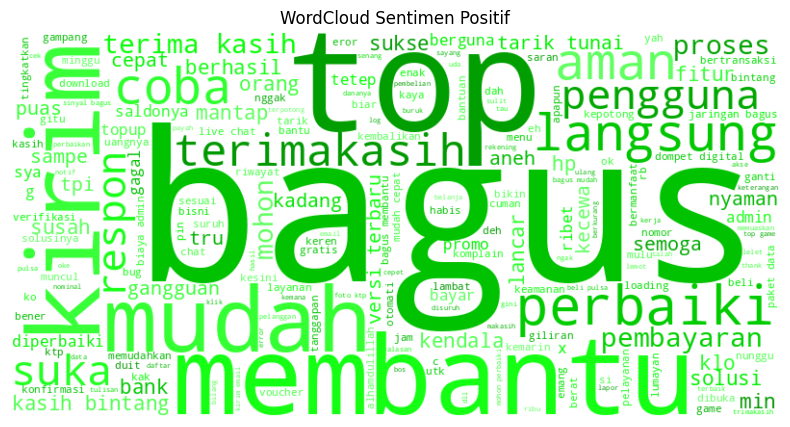

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import random

# Pisahkan data berdasarkan sentimen
positive_reviews = df[df['polarity'] == 'positive']['text_akhir']
negative_reviews = df[df['polarity'] == 'negative']['text_akhir']
neutral_reviews = df[df['polarity'] == 'neutral']['text_akhir']

# Gabungkan teks untuk setiap sentimen
positive_text = ' '.join(positive_reviews)
negative_text = ' '.join(negative_reviews)
neutral_text = ' '.join(neutral_reviews)


# Fungsi untuk menentukan warna berdasarkan sentimen
def color_func_positive(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl(120, 100%, {random.randint(30, 70)}%)"  # Gradasi hijau

def color_func_negative(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl(0, 100%, {random.randint(30, 70)}%)"  # Gradasi merah

def color_func_neutral(word, font_size, position, orientation, random_state=None, **kwargs):
    return f"hsl(0, 0%, {random.randint(40, 60)}%)"  # Gradasi abu-abu

# Buat WordCloud dengan warna sesuai sentimen
def create_wordcloud(text, title, color_func):
    wordcloud = WordCloud(width=800, height=400, background_color='white', color_func=color_func).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(title)
    plt.show()

# Panggil fungsi dengan warna berbeda sesuai sentimen
create_wordcloud(positive_text, "WordCloud Sentimen Positif", color_func_positive)


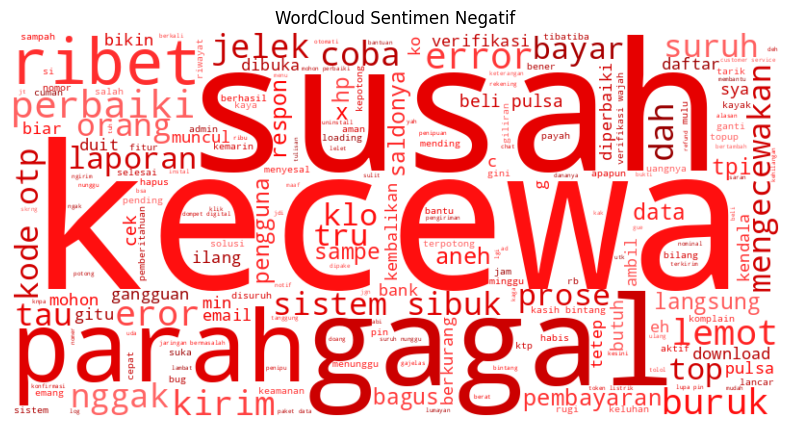

In [28]:
create_wordcloud(negative_text, "WordCloud Sentimen Negatif", color_func_negative)

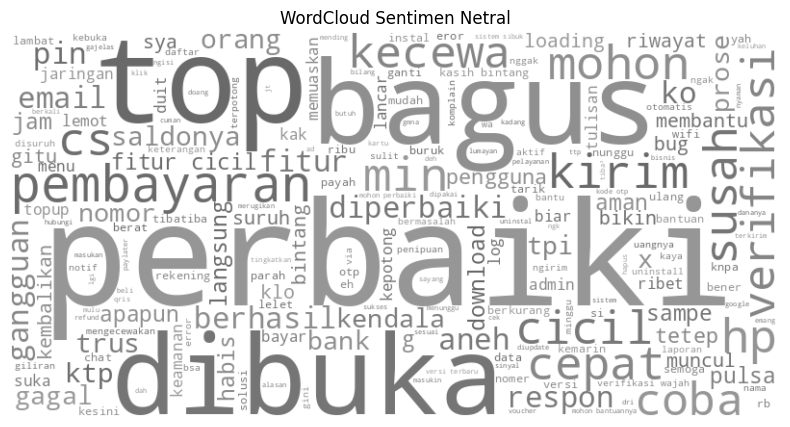

In [29]:
create_wordcloud(neutral_text, "WordCloud Sentimen Netral", color_func_neutral)

In [30]:
X = df['text_akhir']
y = df['polarity']

## Ekstraksi Fitur

In [31]:
# Ekstraksi Fitur TF-IDF
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,2), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['text_akhir'])

In [32]:
# Ekstraksi Fitur Word2Vec
from gensim.models import Word2Vec
import numpy as np

# Latih Model Word2Vec
w2v_model = Word2Vec(sentences=[text.split() for text in df['text_akhir']],
                      vector_size=1000, window=5,
                      min_count=1, workers=4, sg=1, epochs=20)

# Ekstraksi fitur Word2Vec (ambil rata-rata embedding setiap kata dalam teks)
X_w2v = np.array([
    np.mean([w2v_model.wv[word] for word in text.split() if word in w2v_model.wv]
            or [np.zeros(1000)], axis=0)  # Jika teks kosong, isi dengan nol
    for text in df['text_akhir']
])

# Cek hasil shape data
print(f"Shape X_w2v: {X_w2v.shape}")


Shape X_w2v: (100000, 1000)


## Split Data

In [33]:
X_train_tfidf, X_test_tfidf, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, stratify=y, random_state=42)
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(X_w2v, y, test_size=0.3, stratify=y, random_state=42)

## Modelling

### Skema 1: TF-IDF + SVM

In [34]:
# SVM Model
svm = SVC(kernel='linear')
svm.fit(X_train_tfidf, y_train)

# Predict on training data
svm_pred_train = svm.predict(X_train_tfidf)
svm_acc_train = accuracy_score(y_train, svm_pred_train)
print("Akurasi Training SVM (TF-IDF):", svm_acc_train)

# Predict on testing data
svm_pred_test = svm.predict(X_test_tfidf)
svm_acc_test = accuracy_score(y_test, svm_pred_test)
print("Akurasi Testing SVM (TF-IDF):", svm_acc_test)

Akurasi Training SVM (TF-IDF): 0.9410125
Akurasi Testing SVM (TF-IDF): 0.9204


### Skema 2: TF-IDF + Logistic Regression (LR)

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.metrics import accuracy_score

# Definisi distribusi hyperparameter
param_dist = {
    'C': uniform(0.01, 10),  # C akan dicoba dalam rentang 0.01 sampai 10
    'penalty': ['l1', 'l2'],  # Jenis regulasi
    'solver': ['liblinear', 'saga']  # Solver yang mendukung L1/L2
}

# Inisialisasi model Logistic Regression
logistic_regression = LogisticRegression(max_iter=500)

# Randomized Search
random_search = RandomizedSearchCV(
    logistic_regression, param_distributions=param_dist,
    n_iter=10, cv=3, scoring='accuracy', n_jobs=1, random_state=42
)
random_search.fit(X_train_tfidf.toarray(), y_train)

# Model terbaik
best_lr = random_search.best_estimator_
print("Best Params:", random_search.best_params_)

# Prediksi pada data training dan testing
y_pred_train_lr = best_lr.predict(X_train_tfidf.toarray())
y_pred_test_lr = best_lr.predict(X_test_tfidf.toarray())

# Evaluasi akurasi model
accuracy_train_lr = accuracy_score(y_train, y_pred_train_lr)
accuracy_test_lr = accuracy_score(y_test, y_pred_test_lr)

# Menampilkan akurasi
print("Logistic Regression - Akurasi Training:", accuracy_train_lr)
print("Logistic Regression - Akurasi Testing:", accuracy_test_lr)


Best Params: {'C': 1.8282496720710062, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression - Akurasi Training: 0.94735
Logistic Regression - Akurasi Testing: 0.93795


### Skema 3: Word2Vec + Deep Learning (LSTM)

In [36]:
# Import library
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.preprocessing import LabelEncoder


# # Perbaiki Shape Input LSTM**
X_train_w2v = X_train_w2v.reshape((X_train_w2v.shape[0], 1, 1000))
X_test_w2v = X_test_w2v.reshape((X_test_w2v.shape[0], 1, 1000))

# Label Encoding untuk Target**
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train_w2v)
y_test_encoded = label_encoder.transform(y_test_w2v)

print(f"Shape X_train_w2v setelah reshape: {X_train_w2v.shape}")

# Model LSTM**
model_lstm = Sequential([
    Bidirectional(LSTM(64, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)),
    Bidirectional(LSTM(32, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)),
    Bidirectional(LSTM(16, recurrent_dropout=0.4, dropout=0.4)),
    Dense(16, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')
])


# Kompilasi Model
optimizer = tf.keras.optimizers.AdamW(learning_rate=0.001 , weight_decay=1e-4)
model_lstm.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

# Training Model
history = model_lstm.fit(
    X_train_w2v, y_train_encoded,
    epochs=40, batch_size=128,
    validation_data=(X_test_w2v, y_test_encoded),
)

# Evaluasi Model
train_accuracy = history.history['accuracy'][-1]
val_accuracy = history.history['val_accuracy'][-1]

print("Training Accuracy:", train_accuracy)
print("Testing Accuracy:", val_accuracy)


Shape X_train_w2v setelah reshape: (70000, 1, 1000)
Epoch 1/40
547/547 ━━━━━━━━━━━━━━━━━━━━ 59s 60ms/step - accuracy: 0.6387 - loss: 0.8304 - val_accuracy: 0.7865 - val_loss: 0.5588
Epoch 2/40
547/547 ━━━━━━━━━━━━━━━━━━━━ 35s 51ms/step - accuracy: 0.7567 - loss: 0.6281 - val_accuracy: 0.7987 - val_loss: 0.5220
Epoch 3/40
547/547 ━━━━━━━━━━━━━━━━━━━━ 27s 50ms/step - accuracy: 0.7814 - loss: 0.5767 - val_accuracy: 0.8042 - val_loss: 0.4964
Epoch 4/40
547/547 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.7899 - loss: 0.5522 - val_accuracy: 0.8273 - val_loss: 0.4606
Epoch 5/40
547/547 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.7990 - loss: 0.5311 - val_accuracy: 0.8291 - val_loss: 0.4528
Epoch 6/40
547/547 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.8043 - loss: 0.5149 - val_accuracy: 0.8254 - val_loss: 0.4524
Epoch 7/40
547/547 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.8079 - loss: 0.5082 - val_accuracy: 0.8332 - val_loss: 0.4412
Epoch 8/40
547/547 ━━━━━━━━━━━━━━━━━━━

In [37]:
print(f"X_train_w2v shape: {X_train_w2v.shape}")
print(f"y_train_encoded shape: {y_train_encoded.shape}")
print(f"X_test_w2v shape: {X_test_w2v.shape}")
print(f"y_test_encoded shape: {y_test_encoded.shape}")


X_train_w2v shape: (70000, 1, 1000)
y_train_encoded shape: (70000,)
X_test_w2v shape: (30000, 1, 1000)
y_test_encoded shape: (30000,)


In [50]:
# Pilih model terbaik berdasarkan akurasi testing
models = [
    (svm, svm_acc_test, "SVM-TF-IDF"),
    (best_lr, accuracy_test_lr, "LR-TF-IDF"),  # Menggunakan best_lr
    (model_lstm, val_accuracy, "LSTM-W2V")
]

# Validasi model sebelum memilih
valid_models = [(m, acc, name) for m, acc, name in models if acc is not None]
if not valid_models:
    raise ValueError("Tidak ada model yang valid untuk dipilih.")

In [51]:
# Pilih model terbaik
best_model, best_acc, best_method = max(valid_models, key=lambda x: x[1])
print(f"Model terbaik untuk inference: {best_method} dengan akurasi {best_acc}")

Model terbaik untuk inference: LR-TF-IDF dengan akurasi 0.93795


## Inference

In [52]:
# Fungsi Preprocessing

def preprocess_text(text):
    text = cleaningText(text)
    text = casefoldingText(text)
    text = fix_slangwords(text)
    text = tokenizingText(text)
    text = filteringText(text)
    text = toSentence(text)
    return text

# Fungsi Prediksi Sentimen
def predict_sentiment(text):
    if best_model is None:
        raise ValueError("Tidak ada model yang dipilih untuk prediksi.")

    cleaned_text = preprocess_text(text)

    if best_method == "SVM-TF-IDF":
        features = tfidf_vectorizer.transform([cleaned_text])
        return best_model.predict(features)[0]

    elif best_method == "LR-TF-IDF":
        if not hasattr(best_model, "coef_"):
            raise ValueError("Model Logistic Regression belum terlatih.")
        features = tfidf_vectorizer.transform([cleaned_text])
        return best_model.predict(features)[0]

    elif best_method == "LSTM-W2V":
        features = np.mean([w2v_model.wv[word] for word in cleaned_text.split() if word in w2v_model.wv] or [np.zeros(1000)], axis=0).reshape(1, 1, 1000)
        predicted_probs = best_model.predict(features)[0]
        predicted_class = np.argmax(predicted_probs)
        return ["negative", "neutral", "positive"][predicted_class]  # Langsung return hasil

    else:
        raise ValueError(f"Unknown best_method: {best_method}")

In [59]:
# Contoh Kalimat Uji
sample_texts = [
    "Aplikasi ini sangat membantu dan mudah digunakan!",  # Positif
    "Aplikasi ini sering crash dan sangat lambat!",  # Negatif
    "Aplikasi ini cukup baik, tapi masih bisa diperbaiki."  # Netral
]

# Proses Prediksi untuk Banyak Kalimat
for text in sample_texts:
    predicted_sentiment = predict_sentiment(text)
    print(f"Kalimat: {text}")
    print(f"Prediksi Sentimen dari kalimat ini adalah: {predicted_sentiment}\n")

Kalimat: Aplikasi ini sangat membantu dan mudah digunakan!
Prediksi Sentimen dari kalimat ini adalah: positive

Kalimat: Aplikasi ini sering crash dan sangat lambat!
Prediksi Sentimen dari kalimat ini adalah: negative

Kalimat: Aplikasi ini cukup baik, tapi masih bisa diperbaiki.
Prediksi Sentimen dari kalimat ini adalah: neutral

